In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import cdist

In [2]:
df = pd.read_csv(r'C:\Users\mpiernicki\PycharmProjects\K_Means_Algorithm\DATA\basic4.csv')

In [3]:
df.drop(['color'], axis=1, inplace=True)

In [4]:
df.head()

x           y
0  144.475109  101.450265
1  370.683312  298.003415
2  253.714046  234.079402
3  148.699165   78.654006
4  192.157973  252.837304

In [5]:
df.tail()

x           y
12524  141.967251  238.963257
12525  161.932857   67.972458
12526  122.451461   94.133502
12527  182.881854  114.104916
12528  123.857932   92.770134

In [6]:
df.describe()

x             y
count  12529.000000  12529.000000
mean     252.730229    200.991861
std       94.368588     79.893046
min       57.876820     28.500580
25%      175.141025    136.093748
50%      256.816991    200.790004
75%      327.379037    263.893206
max      451.220370    375.904180

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12529 entries, 0 to 12528
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       12529 non-null  float64
 1   y       12529 non-null  float64
dtypes: float64(2)
memory usage: 195.9 KB


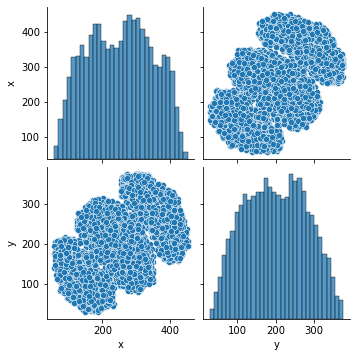

In [8]:
sns.pairplot(data=df)

In [9]:
df_norm = (df-df.min())/(df.max()-df.min())

In [10]:
df_norm

x         y
0      0.220159  0.209985
1      0.795250  0.775763
2      0.497878  0.591758
3      0.230898  0.144366
4      0.341384  0.645752
...         ...       ...
12524  0.213784  0.605816
12525  0.264542  0.113620
12526  0.164169  0.188924
12527  0.317801  0.246412
12528  0.167744  0.185000

[12529 rows x 2 columns]

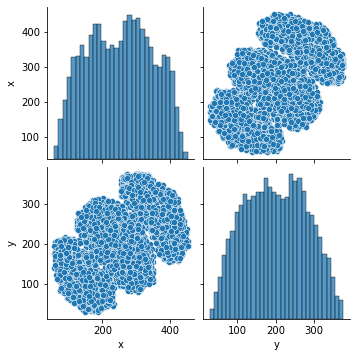

In [11]:
sns.pairplot(data=df)

In [12]:
centers = df.sample(3)

In [13]:
centers

x           y
8466  375.056124  343.673007
952   413.220069  287.798443
9566  223.502293  245.342517

In [14]:
distances = np.zeros((len(df.index),3))

In [15]:
distances

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [16]:
for i in range(3):
    distances[:,i] = (((df.iloc[:, :] - centers.iloc[i, :]) ** 2).sum(axis=1)) ** 0.5
distances

array([[334.42407365, 327.03133922, 164.16539251],
       [ 45.87846041,  43.74376663, 156.3183371 ],
       [163.50736384, 168.30896187,  32.24294944],
       ...,
       [355.07616086, 349.36011862, 181.86653603],
       [299.38680344, 288.48766748, 137.38023136],
       [355.03912935, 348.95055191, 182.22878743]])

In [17]:
closest = np.argmin(distances, axis = 1)

In [18]:
closest

array([2, 1, 2, ..., 2, 2, 2], dtype=int64)

In [19]:
for i in range(len(centers.index)):
    centers.iloc[i] = df[closest == i].mean(axis=0)
    print(centers)

               x           y
8466  327.091601  321.422031
952   413.220069  287.798443
9566  223.502293  245.342517
               x           y
8466  327.091601  321.422031
952   387.238023  241.634093
9566  223.502293  245.342517
               x           y
8466  327.091601  321.422031
952   387.238023  241.634093
9566  203.717442  166.294275


In [20]:
centers

x           y
8466  327.091601  321.422031
952   387.238023  241.634093
9566  203.717442  166.294275

In [21]:
# np.random.seed(4160659)
# X[closest == 0].mean(axis=0)
centers = df.sample(3)
distances = np.zeros((len(df.index),3))


while True:
    old_closest = closest.copy()
    print(closest)
    
    for i in range(3):
        distances[:,i] = (((df.iloc[:, :] - centers.iloc[i,:])**2).sum(axis=1))**0.5
    closest = np.argmin(distances, axis = 1)

    for i in range(len(centers.index)):
        centers.iloc[i] = df[closest == i].mean(axis=0)
    print(centers)
    if all(closest == old_closest):
        break

[2 1 2 ... 2 2 2]
               x           y
9445  244.006402  214.213651
1774  355.819280  287.324890
4146  173.679432  111.486939
[2 1 0 ... 2 2 2]
               x           y
9445  246.056430  205.581398
1774  358.610511  278.106344
4146  149.051657  113.648845
[2 1 0 ... 2 2 2]
               x           y
9445  246.515045  201.056181
1774  358.524534  278.028424
4146  141.091654  113.196221
[2 1 0 ... 2 2 2]
               x           y
9445  246.439910  200.737691
1774  358.426150  277.994584
4146  140.699368  113.206723
[2 1 0 ... 2 2 2]
               x           y
9445  246.433688  200.723723
1774  358.426150  277.994584
4146  140.678103  113.201690
[2 1 0 ... 2 2 2]
               x           y
9445  246.433688  200.723723
1774  358.426150  277.994584
4146  140.678103  113.201690


In [22]:
closest

array([2, 1, 0, ..., 2, 2, 2], dtype=int64)

In [23]:
df['new_column'] = closest.tolist()

In [24]:
df

x           y  new_column
0      144.475109  101.450265           2
1      370.683312  298.003415           1
2      253.714046  234.079402           0
3      148.699165   78.654006           2
4      192.157973  252.837304           0
...           ...         ...         ...
12524  141.967251  238.963257           0
12525  161.932857   67.972458           2
12526  122.451461   94.133502           2
12527  182.881854  114.104916           2
12528  123.857932   92.770134           2

[12529 rows x 3 columns]

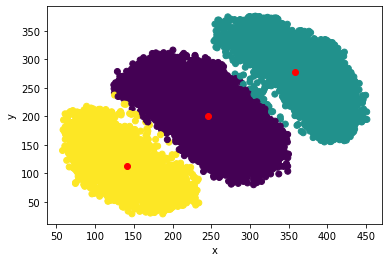

In [25]:
color=['blue','green','cyan']
plt.scatter(df['x'],df['y'], c=closest)
plt.scatter(centers["x"],centers["y"],c='red')
plt.xlabel('x')
plt.ylabel('y')
plt.show()


In [26]:
ddd

NameError: name 'ddd' is not defined